Лабораторная работа №10. Кластеризация

k-Means

Задача 1: Сегментация

In [32]:
import os
os.environ['JOBLIB_CPU_COUNT'] = '1'

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


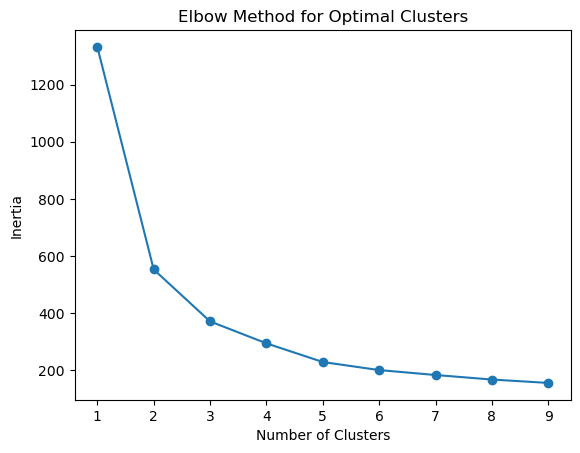

Text(0.5, 1.0, 'DBSCAN Clusters')

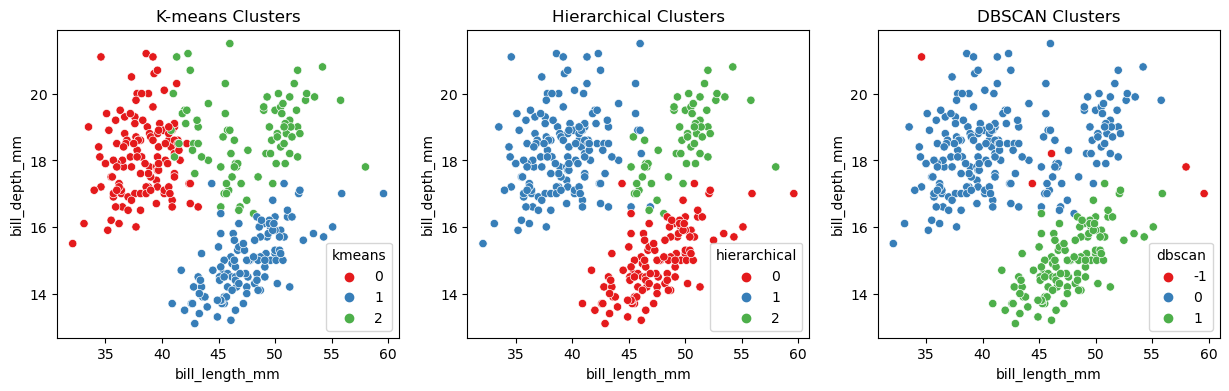

In [30]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import matplotlib.pyplot as plt

penguins = sns.load_dataset("penguins")
print(penguins.head())
penguins_clean = penguins.dropna().copy()

features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
X = penguins_clean[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# выбор оптимального количества кластеров
# --------------------------------
inertia = []
range_n_clusters = range(1, 10)

for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range_n_clusters, inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal Clusters")
plt.show()
# ----------------------------------------
# K-Means с 3 кластерами
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
penguins_clean['kmeans'] = kmeans_labels
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
sns.scatterplot(data=penguins_clean, x='bill_length_mm', y='bill_depth_mm', hue='kmeans', palette='Set1')
plt.title('K-means Clusters')

# Иерархическая кластеризация
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(X_scaled)
penguins_clean['hierarchical'] = hierarchical_labels
plt.subplot(1, 3, 2)
sns.scatterplot(data=penguins_clean, x='bill_length_mm', y='bill_depth_mm', hue='hierarchical', palette='Set1')
plt.title('Hierarchical Clusters')

# DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)
penguins_clean['dbscan'] = dbscan_labels
plt.subplot(1, 3, 3)
sns.scatterplot(data=penguins_clean, x='bill_length_mm', y='bill_depth_mm', hue='dbscan', palette='Set1')
plt.title('DBSCAN Clusters')

Задача 2: Кластеризация текстовых данных (новостных заголовков)

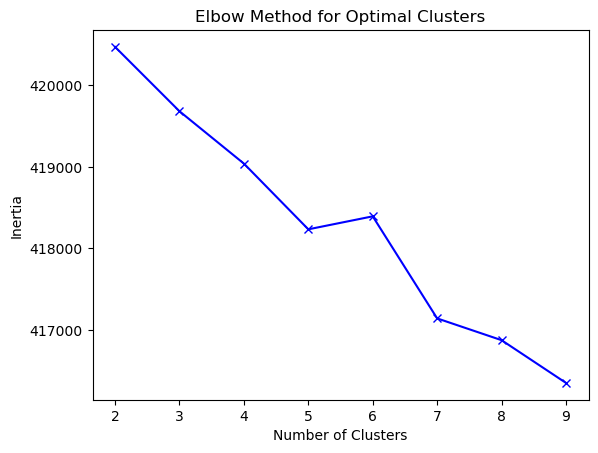


Кластер 0
0    Fed official says weak data caused by weather,...
1    Fed's Charles Plosser sees high bar for change...
2    US open: Stocks fall after Fed official hints ...
3    Fed risks falling 'behind the curve', Charles ...
4    Fed's Plosser: Nasty Weather Has Curbed Job Gr...
5    Plosser: Fed May Have to Accelerate Tapering Pace
6            Fed's Plosser: Taper pace may be too slow
7    Fed's Plosser expects US unemployment to fall ...
8    US jobs growth last month hit by weather:Fed P...
9    ECB unlikely to end sterilisation of SMP purch...
Name: TITLE, dtype: object

Кластер 1
63      EBay CEO Donahoe's Pay Drops by 53% to $13.8 M...
232     'Hacked docs' prove MtGox has 1 MILLION Bitcoi...
257     Bankrupt Exchange Mt. Gox Still Has $600 Milli...
370             Herbalife's lobbying tab nears $2 million
694       Chiquita buys out rival Fyffes for $526 million
978     Insider claims Titanfall has already helped se...
1190    The $350 Million Bitcoin Heist May Have Been 

In [6]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df = pd.read_csv('uci-news-aggregator.csv')

titles = df['TITLE'].dropna().values

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

titles_clean = [preprocess_text(title) for title in titles]

vectorizer = TfidfVectorizer(max_df=0.5, min_df=2, stop_words='english')
X = vectorizer.fit_transform(titles_clean)

k_range = range(2, 10)
inertia = []

for k in k_range:
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    km.fit(X)
    inertia.append(km.inertia_)

plt.plot(k_range, inertia, 'bx-')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title('Elbow Method for Optimal Clusters')
plt.show()

k_optimal = 4
kmeans = KMeans(n_clusters=k_optimal, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X)

df['Cluster'] = clusters

for i in range(k_optimal):
    print(f"\nКластер {i}")
    print(df[df['Cluster'] == i]['TITLE'].head(10))

Задача 3

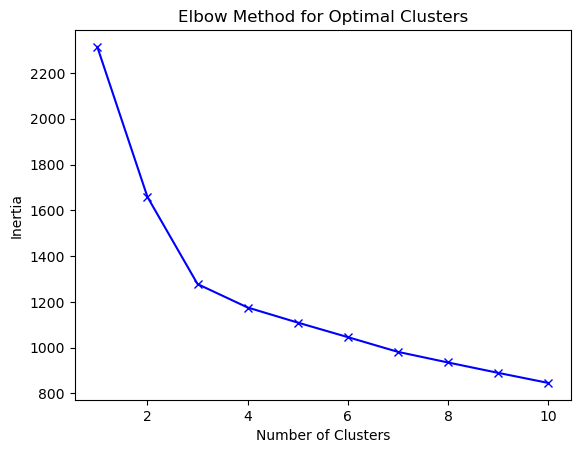

           alcohol  malic_acid       ash  alcalinity_of_ash   magnesium  \
Cluster                                                                   
0        12.250923    1.897385  2.231231          20.063077   92.738462   
1        13.134118    3.307255  2.417647          21.241176   98.666667   
2        13.676774    1.997903  2.466290          17.462903  107.967742   

         total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
Cluster                                                                     
0             2.247692    2.050000              0.357692         1.624154   
1             1.683922    0.818824              0.451961         1.145882   
2             2.847581    3.003226              0.292097         1.922097   

         color_intensity       hue  od280/od315_of_diluted_wines      proline  
Cluster                                                                        
0               2.973077  1.062708                      2.803385   510.169231 

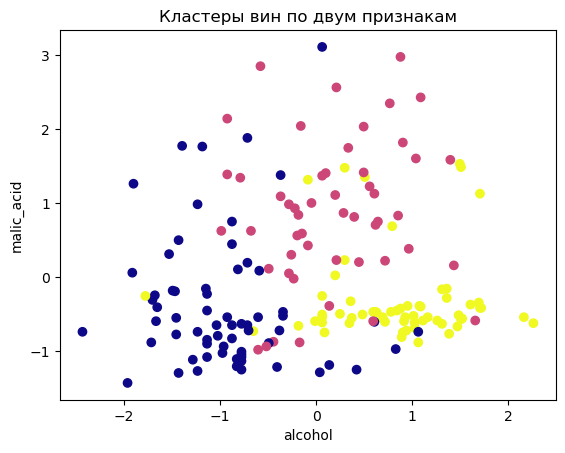

In [55]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wine = load_wine()
X = wine.data
feature_names = wine.feature_names

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia = []
k_range = range(1, 11)
for k in k_range:
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(k_range, inertia, 'bx-')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title('Elbow Method for Optimal Clusters')
plt.show()

optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df = pd.DataFrame(X, columns=feature_names)
df['Cluster'] = clusters

print(df.groupby('Cluster').mean())

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='plasma')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('Кластеры вин по двум признакам')
plt.show()

Иерархические алгоритмы

Задача 1

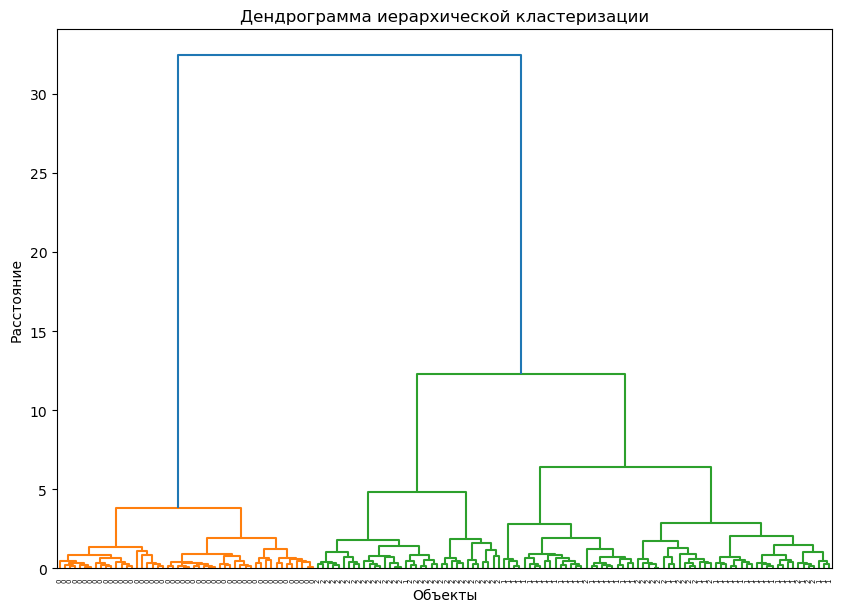

Cluster
0    71
1    49
2    30
Name: count, dtype: int64
Adjusted Rand Index между кластеризацией и истинными метками: 0.615


,Фактические метки,Кластеры
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
145,2,0
146,2,0
147,2,0
148,2,0


In [13]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score

iris = load_iris()
X = iris.data
true_labels = iris.target
feature_names = iris.feature_names
df = pd.DataFrame(X, columns=feature_names)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

linked = linkage(X, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, labels=true_labels)
plt.title('Дендрограмма иерархической кластеризации')
plt.xlabel('Объекты')
plt.ylabel('Расстояние')
plt.show()

n_clusters = 3
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
clusters = agg_clustering.fit_predict(X_scaled)

df['Cluster'] = clusters
print(df['Cluster'].value_counts())

ari_score = adjusted_rand_score(true_labels, clusters)
print(f'Adjusted Rand Index между кластеризацией и истинными метками: {ari_score:.3f}')

pd.DataFrame({'Фактические метки': true_labels, 'Кластеры': clusters})


Задача 3

Задача 4

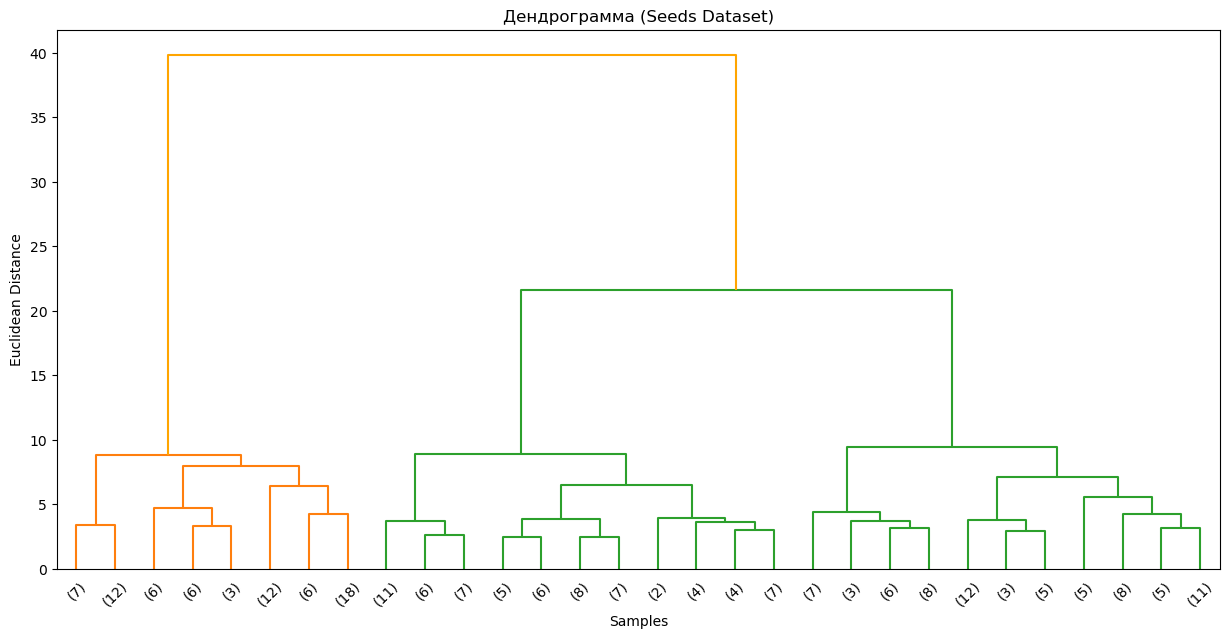

In [58]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

columns = [
    "Area", "Perimeter", "Compactness", "KernelLength", "KernelWidth",
    "AsymmetryCoefficient", "KernelGrooveLength", "Type"
]

data = pd.read_csv("seeds_dataset.txt", delim_whitespace=True, names=columns)

features = data.drop(columns=["Type"])

scaler = StandardScaler()
data_scaled = scaler.fit_transform(features)

linked = linkage(data_scaled, method="ward")

plt.figure(figsize=(15, 7))
dendrogram(linked, truncate_mode="lastp", p=30, above_threshold_color='orange')
plt.title("Дендрограмма (Seeds Dataset)")
plt.xlabel("Samples")
plt.ylabel("Euclidean Distance")
plt.show()

DBSCAN

Задача 1

Adjusted Rand Index: 0.4420986685885924


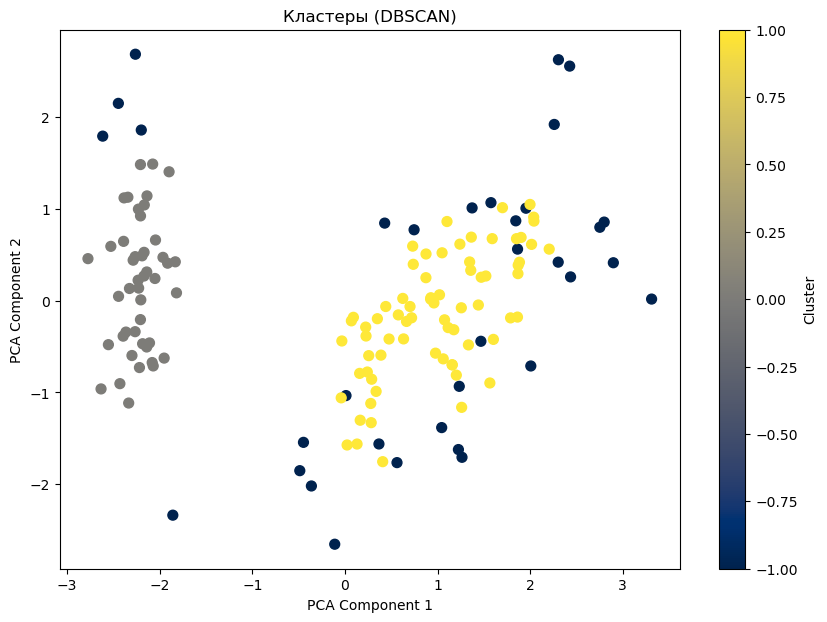

In [59]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

data = pd.DataFrame(X, columns=iris.feature_names)
data['Cluster'] = clusters
data['True_Label'] = y

ari = adjusted_rand_score(y, clusters)
print(f"Adjusted Rand Index: {ari}")

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap="cividis", s=50)
plt.title("Кластеры (DBSCAN)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()

Задача 2

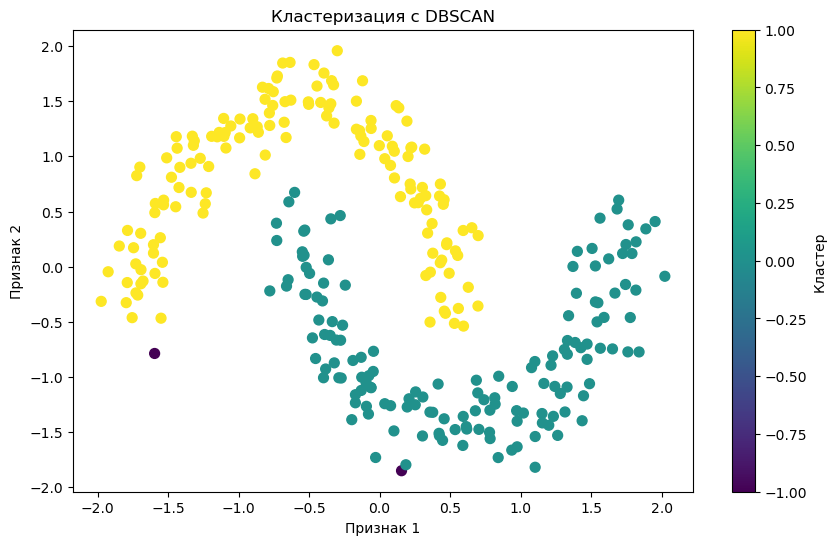

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

X, y_true = make_moons(n_samples=300, noise=0.1, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN(eps=0.3, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', s=50)
plt.title('Кластеризация с DBSCAN')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.colorbar(label='Кластер')
plt.show()

Задача 3

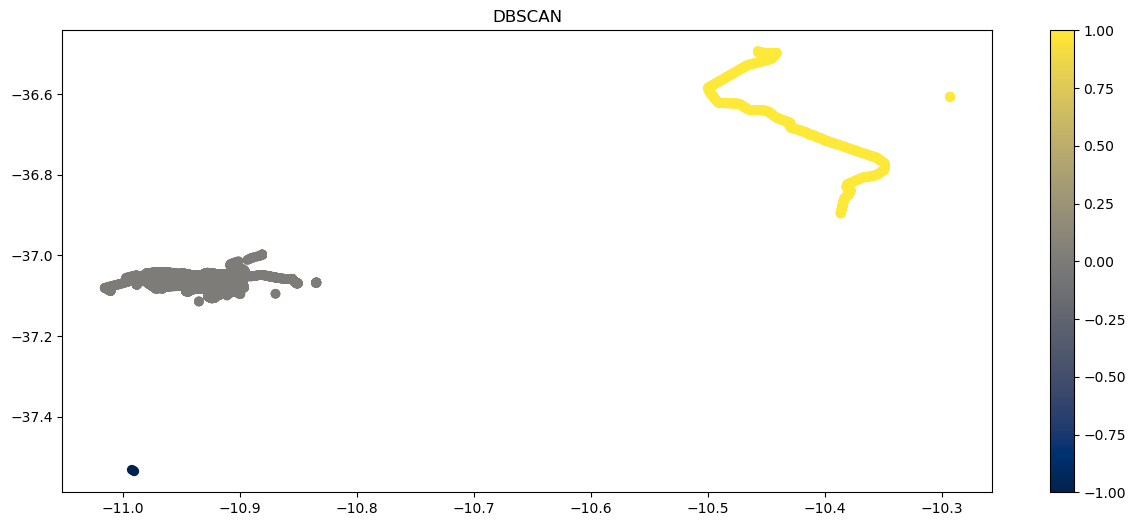

In [60]:
from scipy.stats import zscore

df_gps = pd.read_csv('go_track_trackspoints.csv').drop(columns='time')

#df_gps.head(7)

col = df_gps.describe().columns

# очистка от аномалий
df_gps= df_gps[(np.abs(zscore(df_gps)) < 3).all(axis=1)]

#df_gps.describe()

df_coords = pd.DataFrame(df_gps[['latitude', 'longitude']].to_numpy())

dbscan = DBSCAN(eps=0.005, min_samples=5, algorithm='ball_tree')
clusters = dbscan.fit_predict(np.radians(df_coords))

df_gps['cluster'] = clusters

plt.figure(figsize=(15, 6))
plt.scatter(df_coords[0], df_coords[1], c=clusters, cmap='cividis')
plt.title('DBSCAN')
plt.colorbar()
plt.show()

Задача 4